# 1.import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# 2.Load Datasets

In [2]:
data = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3. Exploratory Data Analysis (EDA)


In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 4.Label Encoding for Categorical Data

In [8]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


 # 5.Standardizing the Data before Clustering

In [9]:
la=StandardScaler()
xdata=la.fit_transform(data)

# 6.Elbow Method for Finding Optimal Number of Clusters

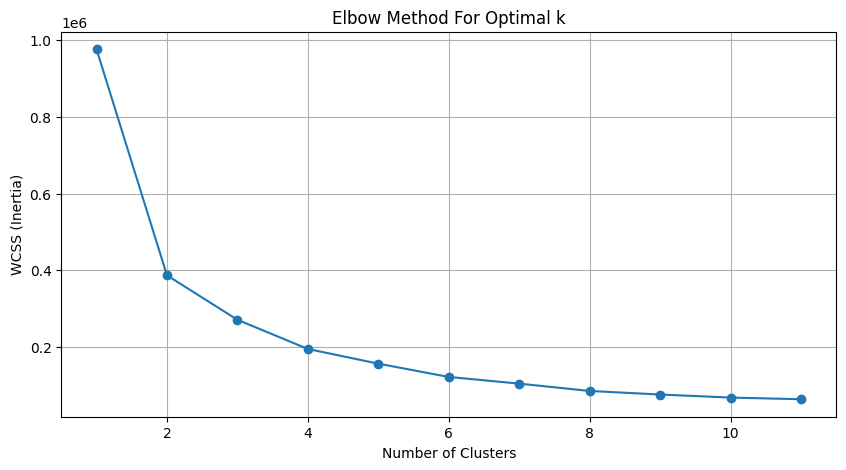

In [10]:
clustersn = []
j = []

for i in range(1, 12):
    model = KMeans(n_clusters=i, random_state=42, n_init=10)  
    model.fit(data)
    clustersn.append(i)
    j.append(model.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(clustersn, j, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


 # 7.Elbow Method Data Table

In [11]:
pd.DataFrame({'clusters':clustersn,'inertia':j})

,clusters,inertia
0,1,975512.060000
1,2,387065.713771
2,3,271396.562966
3,4,195401.198560
4,5,157157.757906
5,6,122625.389195
6,7,105192.977032
7,8,86146.217624
8,9,76917.615882
9,10,68900.885948


 # 8.Final Clustering with Optimal k

In [12]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, random_state=42)
model.fit(data)
data['k_mean'] = model.predict(data)
data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_mean
0,1,1,19,15,39,1
1,2,1,21,15,81,1
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,0
197,198,1,32,126,74,3
198,199,1,32,137,18,0


# 9. Visualizing the Clusters

In [13]:
df1=data[data['k_mean']==0]
df2=data[data['k_mean']==1]
df3=data[data['k_mean']==2]
df4=data[data['k_mean']==3]

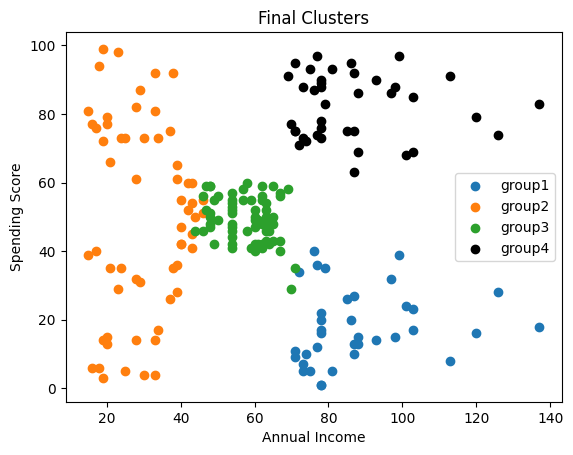

In [14]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='group4',color='black')
plt.title('Final Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

# 10. Clustering Without Standardization

In [15]:
model2 = KMeans(n_clusters=4, n_init=10)
model2.fit(data)
pre = model2.predict(data)


# 11. Visualizing the Clusters

In [16]:
df1=data[data['k_mean']==0]
df2=data[data['k_mean']==1]
df3=data[data['k_mean']==2]
df4=data[data['k_mean']==3]

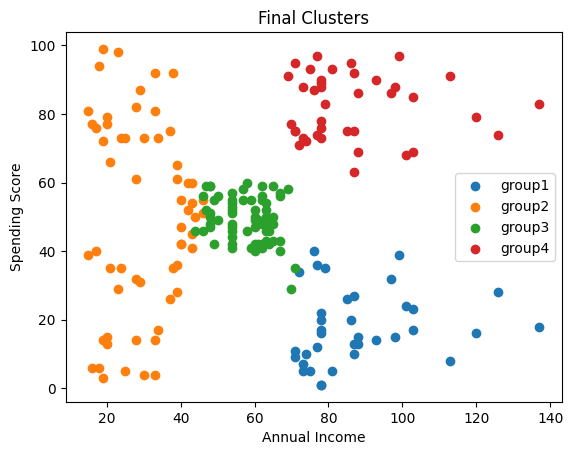

In [17]:
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],label='group1')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],label='group2')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],label='group3')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],label='group4')
plt.title('Final Clusters')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()

 # 12.Exploratory Data Analysis

<Axes: xlabel='k_mean', ylabel='count'>

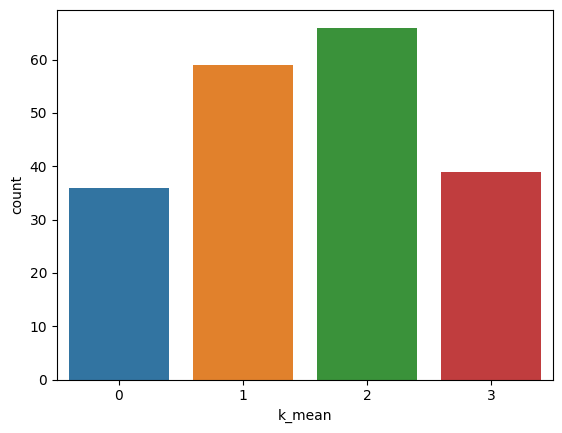

In [18]:
sns.countplot(data=data, x='k_mean')

<Axes: ylabel='count'>

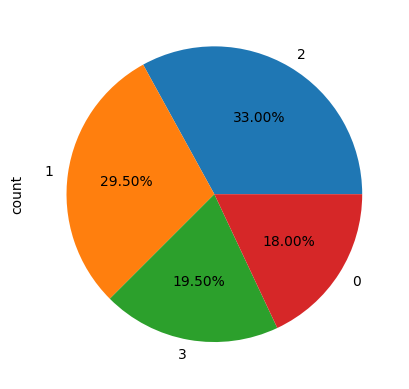

In [19]:
data['k_mean'].value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='k_mean', ylabel='Spending Score (1-100)'>

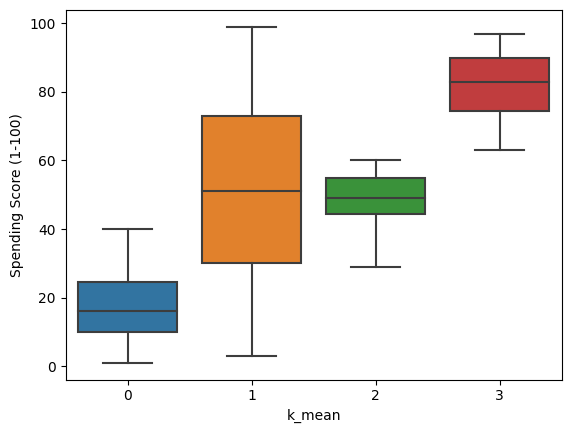

In [20]:
sns.boxplot(x=data.k_mean,y=data['Spending Score (1-100)'])

<Axes: xlabel='Age', ylabel='Count'>

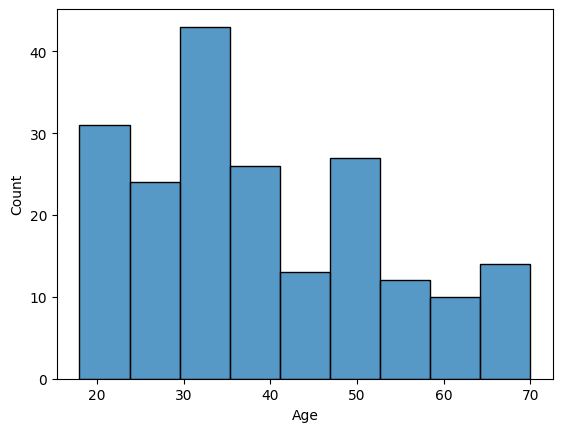

In [21]:
sns.histplot(data.Age)

<Axes: xlabel='k_mean', ylabel='count'>

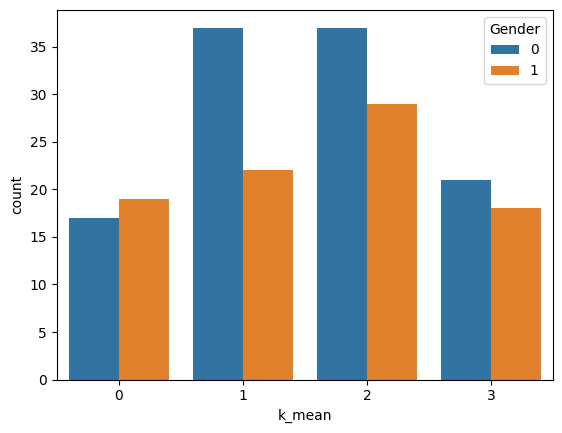

In [22]:
sns.countplot(x=data.k_mean,hue=data.Gender,data=data)

<Axes: xlabel='Gender', ylabel='count'>

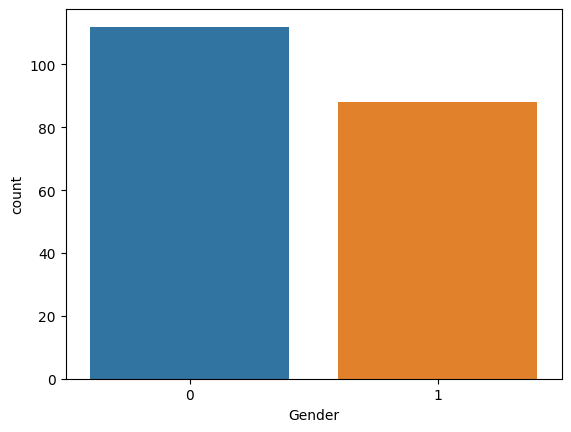

In [23]:
sns.countplot(data=data,x='Gender')